<a href="https://colab.research.google.com/github/martinreder/hgb-wst-spacy/blob/main/spaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data**

For our exercises we will use two different datasets:
- The AG News subset that features english news articles of 4 different categories
- The 10kGNAD dataset that features german news articles of 9 different categories

In [1]:
import csv
import pandas as pd

# english data
classes_en = {1: "World", 2: "Sports", 3: "Business", 4: "Sci/Tech"}
train_en = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/AGNews/train.csv",
                       names = ["Label", "Title", "Article"],
                       encoding = "utf-8")
test_en = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/AGNews/test.csv",
                      names = ["Label", "Title", "Article"],
                      encoding = "utf-8")

# german data
train_de = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/10kGNAD/train.csv",
                       sep = ";", names = ["Label", "Article"],
                       quotechar = "\'", quoting = csv.QUOTE_MINIMAL, encoding = "utf-8")
test_de = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/10kGNAD/test.csv",
                       sep = ";", names = ["Label", "Article"],
                       quotechar = "\'", quoting = csv.QUOTE_MINIMAL, encoding = "utf-8")

### The english dataset features 120 000 training and 7600 test samples with equally balanced classes

In [2]:
print(train_en.shape)
print(test_en.shape)
train_en.head()

(120000, 3)
(7600, 3)


,Label,Title,Article
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


<Axes: >

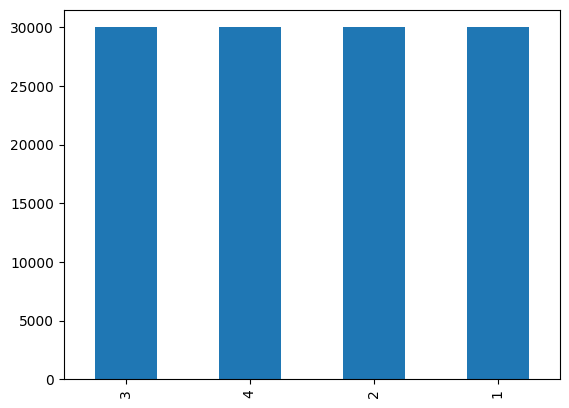

In [3]:
train_en["Label"].value_counts().plot(kind = "bar")

### The german dataset features 9245 training and 1028 test samples with rather unbalanced classes

In [4]:
print(train_de.shape)
print(test_de.shape)
train_de.head()

(9245, 2)
(1028, 2)


,Label,Article
0,Sport,21-Jähriger fällt wohl bis Saisonende aus. Wie...
1,Kultur,"Erfundene Bilder zu Filmen, die als verloren g..."
2,Web,Der frischgekürte CEO Sundar Pichai setzt auf ...
3,Wirtschaft,"Putin: ""Einigung, dass wir Menge auf Niveau vo..."
4,Inland,Estland sieht den künftigen österreichischen P...


<Axes: >

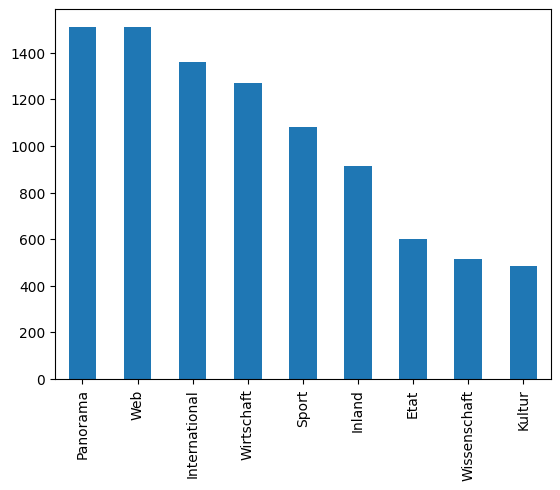

In [5]:
train_de["Label"].value_counts().plot(kind = "bar")

# **spaCy**

spaCy is a natural language processing library that comes with many built-in features that solve core linguistic tasks.  
The following exercises should be carried out by getting familiar with the spaCy API. The documentation can be found at:

[https://spacy.io/usage](https://spacy.io/usage)

spaCy needs a language model to analyze text, we will work with both the english and the german language models which can be downloaded by executing the following:

In [6]:
%%capture output
!python -m spacy download en_core_web_sm

In [7]:
if "Download and installation successful" in output.stdout:
    print("Download and installation successful!")
else:
    print(output.stdout)
    print(output.stderr)

Download and installation successful!


In [8]:
%%capture output
!python -m spacy download en_core_web_lg

In [11]:
if "Download and installation successful" in output.stdout:
    print("Download and installation successful!")
else:
    print(output.stdout)
    print(output.stderr)

Download and installation successful!


In [9]:
%%capture output
!python -m spacy download de_core_news_sm

In [12]:
if "Download and installation successful" in output.stdout:
    print("Download and installation successful!")
else:
    print(output.stdout)
    print(output.stderr)

Download and installation successful!


In [10]:
%%capture output
!python -m spacy download de_core_news_lg

In [ ]:
if "Download and installation successful" in output.stdout:
    print("Download and installation successful!")
else:
    print(output.stdout)
    print(output.stderr)

Download and installation successful!


### Loading models

In [13]:
import spacy
import random
import en_core_web_lg
import de_core_news_lg

nlp_en = en_core_web_lg.load()
nlp_de = de_core_news_lg.load()

### Use spaCy to tokenize a random Article of both the english and the german dataset

In [34]:
# select a random english article
r_en = random.randint(0, train_en.shape[0] - 1)
print(train_en['Article'].values[r_en])
doc_en = nlp_en(train_en['Article'].values[r_en])

for token in doc_en:
  print(token.text)


 WASHINGTON (Reuters) - The October average U.S. house price  jumped 8.5 percent from a year ago, setting the stage for  mortgage giants Fannie Mae and Freddie Mac to raise the limit  on mortgages they can buy, a Federal Housing Finance Board  survey showed on Tuesday.
 
WASHINGTON
(
Reuters
)
-
The
October
average
U.S.
house
price
 
jumped
8.5
percent
from
a
year
ago
,
setting
the
stage
for
 
mortgage
giants
Fannie
Mae
and
Freddie
Mac
to
raise
the
limit
 
on
mortgages
they
can
buy
,
a
Federal
Housing
Finance
Board
 
survey
showed
on
Tuesday
.


In [40]:
# select a random german article
r_de = random.randint(0, train_de.shape[0] - 1)
print(train_de['Article'].values[r_de])
doc_de = nlp_de(train_de['Article'].values[r_de])
for token in doc_de:
  print(token.text)
# your code here
# ...

Bis Ende 2016 werden die Ostbankenbeteiligungen mit derzeit 48.000 Mitarbeitern nach Italien transferiert. Der D-Day ist vorbei, Unicredit-Chef Federico Ghizzoni hat gesprochen. Nun wird die größte italienische Bankengruppe umgebaut und zur Ader gelassen. Am Mittwoch gab Ghizzoni in Mailand seinen rigorosen und realistischen Plan bekannt: 18.200 Mitarbeiter müssen ihren Hut nehmen. Derzeit beschäftigt Unicredit 130.000 Mitarbeiter. Blut, Schweiß und Tränen wird es vor allem für die Mitarbeiter der Bank Austria (BA) geben. Sie gehört den Mailändern seit 2005 – bis auf 10.115 Namensaktien, die der Gemeinde-Wien-nahen AVZ-Stiftung und dem Betriebsratsfonds (115 Aktien) gehören und Mitspracherechte einräumen. Die Bank Austria wird entthront: Die Italiener nehmen ihrer Tochter in Wien deren zentrale Aufgabe, die Zuständigkeit fürs gewinnträchtige Geschäft in Osteuropa (CEE). Um die Struktur der Unicredit einfacher zu machen und die Steuerungsfunktionen zu bündeln, wird das CEE-Geschäft (sam

### Use spaCy to lemmatize a random Article of both the english and the german dataset

In [37]:
# your code here [en]
lemmatizer = nlp_en.get_pipe("lemmatizer")
print(lemmatizer)
doc = nlp_en(train_en['Article'].values[r_en])
print([token.lemma_ for token in doc])

[' ', 'WASHINGTON', '(', 'Reuters', ')', '-', 'the', 'October', 'average', 'U.S.', 'house', 'price', ' ', 'jump', '8.5', 'percent', 'from', 'a', 'year', 'ago', ',', 'set', 'the', 'stage', 'for', ' ', 'mortgage', 'giant', 'Fannie', 'Mae', 'and', 'Freddie', 'Mac', 'to', 'raise', 'the', 'limit', ' ', 'on', 'mortgage', 'they', 'can', 'buy', ',', 'a', 'Federal', 'Housing', 'Finance', 'Board', ' ', 'survey', 'show', 'on', 'Tuesday', '.']


In [42]:
# your code here [de]
lemmatizer = nlp_de.get_pipe("lemmatizer")
print(lemmatizer)
doc = nlp_de(train_de['Article'].values[r_de])
print([token.lemma_ for token in doc])

['bis', 'Ende', '2016', 'werden', 'der', 'Ostbankenbeteiligung', 'mit', 'derzeit', '48.000', 'Mitarbeiter', 'nach', 'Italien', 'transferieren', '--', 'der', 'D-Day', 'sein', 'vorbei', '--', 'Unicredit-Chef', 'Federico', 'Ghizzoni', 'haben', 'sprechen', '--', 'nun', 'werden', 'der', 'groß', 'italienisch', 'Bankengruppe', 'umbauen', 'und', 'zu', 'Ader', 'lassen', '--', 'an', 'Mittwoch', 'geben', 'Ghizzoni', 'in', 'Mailand', 'sein', 'rigoros', 'und', 'realistisch', 'Plan', 'bekannt', '--', '18.200', 'Mitarbeiter', 'müssen', 'ihr', 'Hut', 'nehmen', '--', 'derzeit', 'beschäftigen', 'Unicredit', '130.000', 'Mitarbeiter', '--', 'Blut', '--', 'Schweiß', 'und', 'Träne', 'werden', 'es', 'vor', 'alle', 'für', 'der', 'Mitarbeiter', 'der', 'Bank', 'Austria', '--', 'BA', '--', 'geben', '--', 'sie', 'gehören', 'der', 'Mailänder', 'seit', '2005', '--', 'bis', 'auf', '10.115', 'Namensakti', '--', 'der', 'der', 'gemeinde-Wien-nah', 'AVZ-Stiftung', 'und', 'der', 'Betriebsratsfond', '--', '115', 'Aktie', 

### Use spaCy for Part-Of-Speech tagging of a random Article of both the english and the german dataset

- Either print the token attributes or visualize them as a table!
- What do the attributes describe?
- Visualize the POS attribute as a dependency plot with spaCy's displacy!
- Optional: For the german dataset visualize sentences separately for better readability.

In [43]:
# your code here [en]

for token in doc_en:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)


    SPACE _SP dep   False False
WASHINGTON WASHINGTON PROPN NNP ROOT XXXX True False
( ( PUNCT -LRB- punct ( False False
Reuters Reuters PROPN NNP appos Xxxxx True False
) ) PUNCT -RRB- punct ) False False
- - PUNCT : punct - False False
The the DET DT det Xxx True True
October October PROPN NNP compound Xxxxx True False
average average ADJ JJ amod xxxx True False
U.S. U.S. PROPN NNP compound X.X. False False
house house NOUN NN compound xxxx True False
price price NOUN NN nsubj xxxx True False
    SPACE _SP dep   False False
jumped jump VERB VBD ccomp xxxx True False
8.5 8.5 NUM CD nummod d.d False False
percent percent NOUN NN npadvmod xxxx True False
from from ADP IN prep xxxx True True
a a DET DT det x True True
year year NOUN NN npadvmod xxxx True False
ago ago ADV RB pcomp xxx True False
, , PUNCT , punct , False False
setting set VERB VBG advcl xxxx True False
the the DET DT det xxx True True
stage stage NOUN NN dobj xxxx True False
for for SCONJ IN mark xxx True True
    SPACE 

In [ ]:
from spacy import displacy
displacy
# your code here [en]

In [44]:
# your code here [de]

for token in doc_de:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

Bis bis ADP APPR mo Xxx True True
Ende Ende NOUN NN nk Xxxx True True
2016 2016 NUM CARD nk dddd False False
werden werden AUX VAFIN ROOT xxxx True True
die der DET ART nk xxx True True
Ostbankenbeteiligungen Ostbankenbeteiligung NOUN NN sb Xxxxx True False
mit mit ADP APPR mo xxx True True
derzeit derzeit ADV ADV mo xxxx True False
48.000 48.000 NUM CARD nk dd.ddd False False
Mitarbeitern Mitarbeiter NOUN NN nk Xxxxx True False
nach nach ADP APPR mo xxxx True True
Italien Italien PROPN NE nk Xxxxx True False
transferiert transferieren VERB VVPP oc xxxx True False
. -- PUNCT $. punct . False False
Der der DET ART nk Xxx True True
D-Day D-Day NOUN NE sb X-Xxx False False
ist sein AUX VAFIN ROOT xxx True True
vorbei vorbei ADV ADV mo xxxx True False
, -- PUNCT $, punct , False False
Unicredit-Chef Unicredit-Chef NOUN NN sb Xxxxx-Xxxx False False
Federico Federico PROPN NE pnc Xxxxx True False
Ghizzoni Ghizzoni PROPN NE nk Xxxxx True False
hat haben AUX VAFIN cj xxx True True
gesprochen s

In [ ]:
# your code here [de]

### Use spaCy for Named Entity Recognition (NER) of a random Article of both the english and the german dataset

- Either print the entity attributes or visualize them as a table!
- Visualize the entities as an entity plot with spaCy's displacy!

In [ ]:
# your code here [en]

In [ ]:
# your code here [en]

In [ ]:
# your code here [de]

In [ ]:
# your code here [de]

### We can also use spaCy to calculate the similarity between a german and an english article

- Read also: [https://spacy.io/usage/spacy-101#vectors-similarity](https://spacy.io/usage/spacy-101#vectors-similarity)

In [ ]:
tokens_de.similarity(tokens_en)

-0.03828550410754585

In [ ]:
fruits = nlp_en("apple banana")
fruits[0].similarity(fruits[1])

0.6646700501441956

### spaCy also encodes documents and tokens as feature vectors (we might come back to this later on)

In [ ]:
token = tokens_en[0]
print(token.vector.shape)
print(tokens_en.vector.shape)

(300,)
(300,)
